## Optional Lab: Diagnosing Bias and Variance

Laboratorio Opcional: Diagnóstico de Sesgo y Varianza

Viste cómo evaluar el rendimiento de un algoritmo de aprendizaje midiendo su error en el conjunto de entrenamiento y en la validación cruzada. Con estos valores, puedes cuantificar qué tan bien está funcionando un modelo, lo que te ayuda a tomar decisiones sobre cuál usar para una aplicación dada. En este laboratorio, continuarás con este proceso y explorarás algunos consejos para mejorar el rendimiento de tus modelos. Resulta que los errores de entrenamiento y validación cruzada pueden indicarte qué hacer a continuación para mejorar tus modelos. Específicamente, te mostrarán si tienes un problema de alto sesgo (subajuste) o alta varianza (sobreajuste). La diapositiva de la conferencia mostrada a continuación da un ejemplo:

La figura de la izquierda muestra un problema de alto sesgo, donde el modelo no está capturando los patrones en los datos de entrenamiento. Como resultado, tendrás un alto error de entrenamiento y validación cruzada. La figura de la derecha, por otro lado, muestra un problema de alta varianza, donde el modelo ha sobreajustado el conjunto de entrenamiento. Por lo tanto, aunque tenga un bajo error de entrenamiento, su rendimiento será pobre en nuevos ejemplos, lo que se indica con un alto error de validación cruzada. El modelo ideal sería la figura en el medio, donde el modelo aprende exitosamente del conjunto de entrenamiento y también generaliza bien a datos no vistos. Algunos consejos sobre qué hacer a continuación para lograr este modelo "perfecto".

## Para corregir un problema de alto sesgo, puedes:

* Intentar agregar características polinomiales
* Intentar obtener características adicionales
* Intentar disminuir el parámetro de regularización

##Para corregir un problema de alta varianza, puedes:

* Intentar aumentar el parámetro de regularización
* Intentar conjuntos de características más pequeños
* Obtener más ejemplos de entrenamiento
* Probarás todos estos consejos en este laboratorio. ¡Empecemos!

##UTILS FUNCTIONS

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/Machine Learning Mendoza/Advanced Algorithms/data/data_week3/Files/data/'
filename = 'c2w3_lab2_data1.csv'

In [75]:
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(f"{path}{filename}")
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")


the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



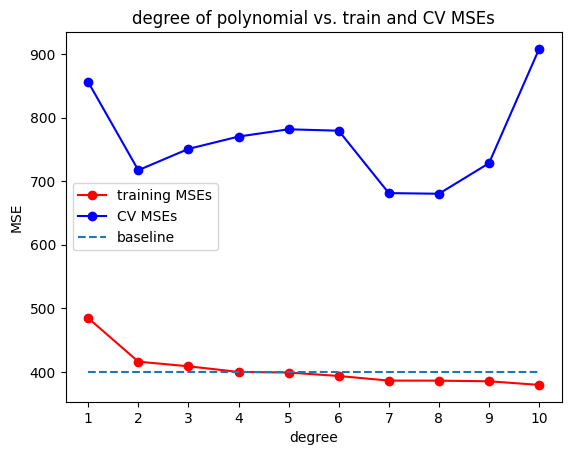

In [76]:
model = LinearRegression()

# Train and plot polynomial regression models
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=400)

Como puedes ver, mientras más características polinomiales agregas, mejor se ajusta el modelo a los datos de entrenamiento.

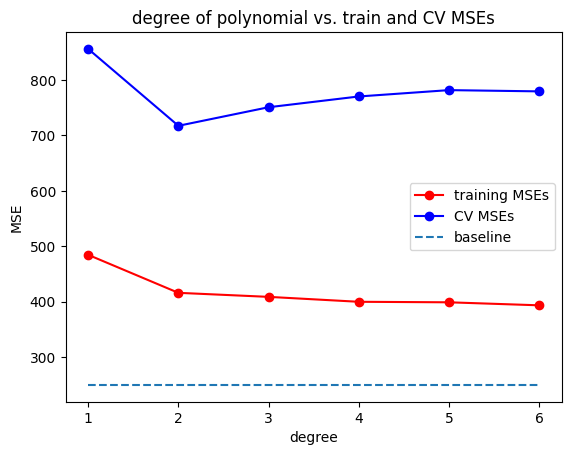

In [77]:
# Train and plot polynomial regression models. Bias is defined lower.
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=6, baseline=250)

##MORE FEATURES TO TREAT HIGH BIAS:

In [78]:
filename2 = 'c2w3_lab2_data2.csv'

In [79]:
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(f"{path}{filename2}")

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



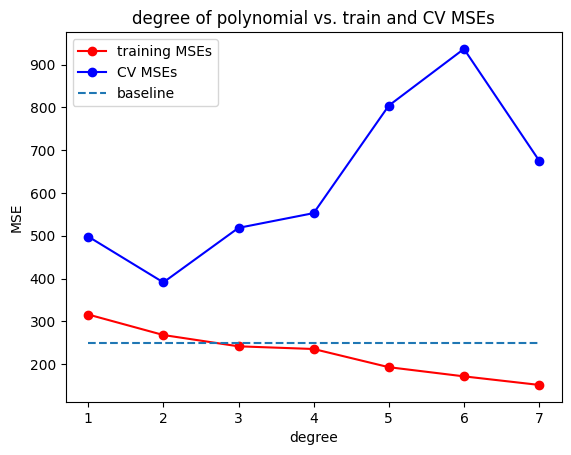

In [80]:
#Instantiate the model class
model = LinearRegression()

#Train and plot polynomial regression models. dataset used has 2 features
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=7, baseline=250)

### Try decreasing the regularization parameter

En este punto, podrías querer introducir regularización para evitar el sobreajuste. Una cosa a tener en cuenta es que podrías hacer que tus modelos subajusten si configuras el parámetro de regularización demasiado alto. La siguiente celda entrena un modelo polinomial de cuarto grado usando la clase Ridge, que te permite establecer un parámetro de regularización (es decir, lambda o
𝜆
λ). Probarás varios valores y compararás los resultados.

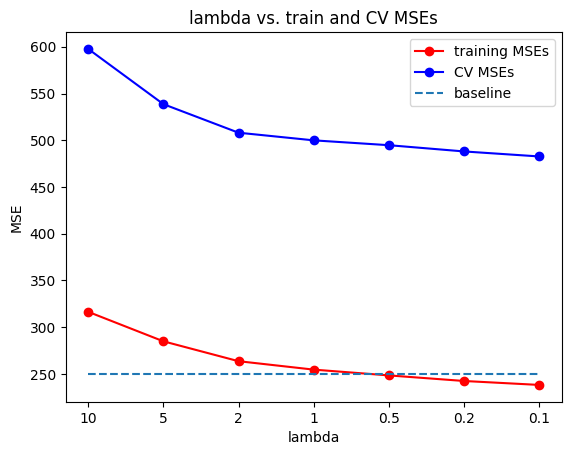

In [81]:
# Define lambdas to plot
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

# Define degree of polynomial and train for each value of lambda
train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree=7, baseline=250)

La gráfica resultante muestra un λ inicial de 10 y, como puedes ver, el error de entrenamiento es peor que la línea base en ese punto. Esto implica que se está aplicando una penalización muy alta a los parámetros w, lo que impide que el modelo aprenda patrones más complejos en tus datos. A medida que disminuyes
𝜆
λ, el modelo afloja esta restricción y el error de entrenamiento puede acercarse al rendimiento de la línea base.

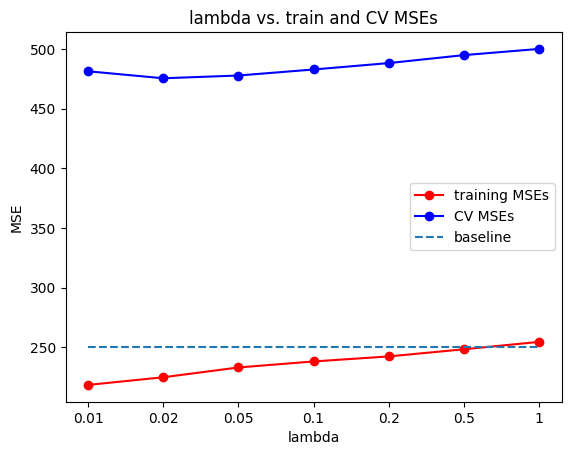

In [82]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Define degree of polynomial and train for each value of lambda
train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 7, baseline=250)

### Try smaller sets of features

You've already seen in the last lab that having too many polynomial terms can result in overfitting. You can reduce the number of such terms and see where you get the best balance of training and cross validation error. Another scenario where reducing the number of features would be helpful is when you have irrelevant features in your data. For example, patient IDs that hospitals give will not help in diagnosing a tumor so you should make sure to remove it from your training data.

To illustrate how removing features can improve performance, you will do polynomial regression for 2 datasets: the same data you used above (2 features) and another with a random ID column (3 features). You can preview these using the cell below. Notice that 2 columns are identical and a 3rd one is added to include random numbers.

Prueba conjuntos de características más pequeños

Ya has visto en el último laboratorio que tener demasiados términos polinomiales puede resultar en un sobreajuste. Puedes reducir la cantidad de estos términos y ver dónde obtienes el mejor equilibrio entre el error de entrenamiento y el de validación cruzada. Otro escenario donde reducir el número de características sería útil es cuando tienes características irrelevantes en tus datos. Por ejemplo, los identificadores de pacientes que proporcionan los hospitales no ayudarán a diagnosticar un tumor, por lo que debes asegurarte de eliminarlos de tus datos de entrenamiento.

Para ilustrar cómo la eliminación de características puede mejorar el rendimiento, realizarás una regresión polinomial para 2 conjuntos de datos: los mismos datos que usaste anteriormente (2 características) y otro con una columna de identificación aleatoria (3 características). Puedes previsualizar estos utilizando la celda a continuación. Observa que 2 columnas son idénticas y se añade una tercera columna que incluye números aleatorios.

In [83]:
filename3 = 'c2w3_lab2_data3.csv'

In [84]:
# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(f"{path}{filename2}")

# Preview the first 5 rows
print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")

# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(f"{path}{filename3}")

# Preview the first 5 rows
print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



Now you will train the models and plot the results. The solid lines in the plot show the errors for the data with 2 features while the dotted lines show the errors for the dataset with 3 features. As you can see, the one with 3 features has higher cross validation error especially as you introduce more polynomial terms. This is because the model is also trying to learn from the random IDs even though it has nothing to do with the target.

Another way to look at it is to observe the points at degree=4. You'll notice that even though the *training error* is lower with 3 features, the *gap between the training error and cross validation error* is a lot wider than when you only use 2 features. This should also warn you that the model is overfitting.

Ahora entrenarás los modelos y graficarás los resultados. Las líneas sólidas en la gráfica muestran los errores para los datos con 2 características, mientras que las líneas punteadas muestran los errores para el conjunto de datos con 3 características. Como puedes ver, el conjunto con 3 características tiene un error de validación cruzada más alto, especialmente a medida que introduces más términos polinomiales. Esto se debe a que el modelo también está tratando de aprender de los identificadores aleatorios, aunque no tienen nada que ver con la variable objetivo.

Otra forma de verlo es observar los puntos en grado=4  Notarás que, aunque el error de entrenamiento es más bajo con 3 características, la brecha entre el error de entrenamiento y el error de validación cruzada es mucho mayor que cuando solo utilizas 2 características. Esto también debería advertirte que el modelo está sobreajustando.

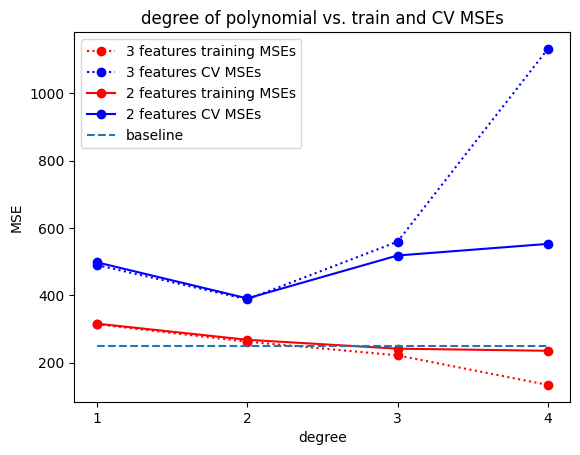

In [85]:
#Define the model
model = LinearRegression()

#Define properties of the 2 datasets
file1 = {'filename':f"{path}{filename3}", 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':f"{path}{filename2}", 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

#Train and plot for each dataset
train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

In [86]:
filename4 = 'c2w3_lab2_data4.csv'

the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



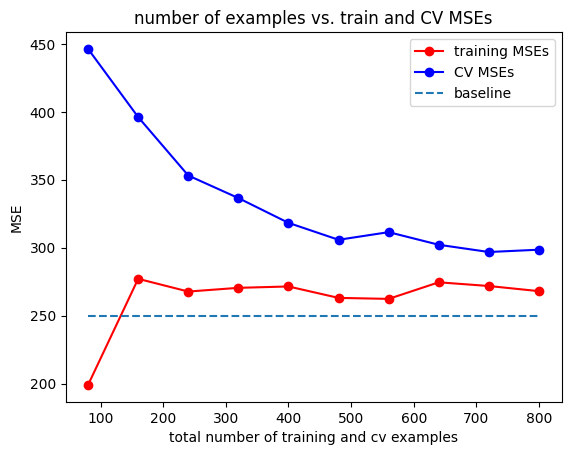

In [87]:
# Prepare the dataset
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(f'{path}{filename4}')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

# Instantiate the model class
model = LinearRegression()

# Define the degree of polynomial and train the model using subsets of the dataset.
train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)